In [3]:
import torch
from torch import nn
from torch.utils.data import Dataset,DataLoader
from torchvision.io import read_image
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


/home/pei/torchEnv/lib/python3.6/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
## Define custom dataset
class CustomDatasetFromCSV(Dataset):
    def __init__(self, csv_path, height, width, transforms=None):      
        self.data = pd.read_csv(csv_path)
        self.labels = np.asarray(self.data.iloc[:, 0])
        self.height = height
        self.width = width
        self.transforms = transforms

    def __getitem__(self, index):
        single_image_label = self.labels[index]        
        img_as_np = np.asarray(self.data.iloc[index][1:]).reshape(28,28).astype('uint8')	
        img_as_img = Image.fromarray(img_as_np)
        #transform image to tensor
        img_as_img = img_as_img.convert('L')    
        if self.transforms is not None:
            img_as_tensor = self.transforms(img_as_img)       
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)

In [6]:
## Create custom dataset

transformations = transforms.Compose([transforms.ToTensor()])
imageData = CustomDatasetFromCSV('./train.csv',784,784,transformations)

In [7]:
img = imageData[0]
print(type(img))
train_loader = DataLoader(imageData, batch_size = 20)

<class 'tuple'>


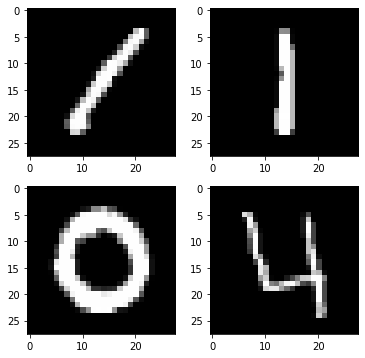

In [12]:
vis_data_normal=next(iter(train_loader))
fig, ax = plt.subplots(2, 2, figsize = (6, 6))
for j in range(0,2):
    for i in range(0,2):
        ax[i, j].imshow(np.squeeze(vis_data_normal[0][i+(j*2)]), cmap='gray')


In [22]:
## Divide data into train_data and test_data

from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 28
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
imageData_size = len(imageData)
indices = list(range(imageData_size))
split = int(np.floor(validation_split * imageData_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

test_data = torch.utils.data.DataLoader(imageData, batch_size=batch_size,
                                                sampler=valid_sampler)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer = nn.Sequential(
        nn.Conv2d(1,32,3,1),
        nn.Sigmoid(),
        nn.Conv2d(32,32,3,1),
        nn.Sigmoid(),
        nn.Conv2d(32,32,5,2,3),
        )

    def forward(self, x):
        x = self.layer(x)
        logits = self.layer(x)
        return logits
